In [75]:
import random
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
# We generated a test dataset by sampling from three Gaussians (100 data points each) 
# centered at randomly chosen locations, [(-0.0985, -0.3379), (-0.6325, 0.9322), (1.1078, 1.0856)], 
# with identical covariance matrices 0.04I2, Fig. 3A. 
# Then, we applied Algorithm 1 with the regularization coefficient, lambda = 0.6 
# and found that it correctly clustered the data, Fig. 3A

In [34]:
# Step 1: Generate 3 Gaussians with the given centers & covariances 
x0 = np.random.multivariate_normal(mean = [-0.0985, -0.3379], cov = [[0.04, 0], [0, 0.04]], size = 100)
x1 = np.random.multivariate_normal(mean = [-0.6325, 0.9322], cov = [[0.04, 0], [0, 0.04]], size = 100)
x2 = np.random.multivariate_normal(mean = [1.1078, 1.0856], cov = [[0.04, 0], [0, 0.04]], size = 100)

y0 = []
y1 = []
y2 = []
for i in range(0,100):
    y0.append([0])
    y1.append([1])
    y2.append([2])

X = np.vstack([x0, x1, x2])
y = np.vstack([y0, y1, y2])

indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [44]:
# Sanity Checking y
# y

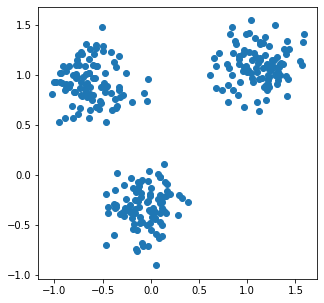

In [43]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [48]:
np.random.seed(10)
x0 = np.random.normal(0.0, 1.0, [100, 2]) * np.sqrt(0.04) + [-0.0985, -0.3379] # (100, 2)
x1 = np.random.normal(0.0, 1.0, [100, 2]) * np.sqrt(0.04) + [-0.6325,  0.9322] # (100, 2)
x2 = np.random.normal(0.0, 1.0, [100, 2]) * np.sqrt(0.04) + [1.1078,   1.0856] # (100, 2)

y0 = np.array([0] * 100, dtype=np.int32)
y1 = np.array([1] * 100, dtype=np.int32)
y2 = np.array([2] * 100, dtype=np.int32)

X = np.vstack([x0, x1, x2]) # 300, 2
c = np.hstack([y0, y1, y2]) # 300

indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
c = c[indices]

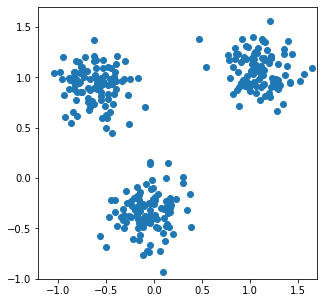

In [49]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1])
plt.xlim(-1.2, 1.7)
plt.ylim(-1.0, 1.7)
plt.show()

In [76]:
# Step 1: Generate 3 Gaussians with the given centers & covariances 
x0 = np.random.multivariate_normal(mean = [-0.0985, -0.3379], cov = [[0.04, 0], [0, 0.04]], size = 100)
x1 = np.random.multivariate_normal(mean = [-0.6325, 0.9322], cov = [[0.04, 0], [0, 0.04]], size = 100)
x2 = np.random.multivariate_normal(mean = [1.1078, 1.0856], cov = [[0.04, 0], [0, 0.04]], size = 100)

y0 = np.array([0] * 100, dtype=np.int32)
y1 = np.array([1] * 100, dtype=np.int32)
y2 = np.array([2] * 100, dtype=np.int32)

X = np.vstack([x0, x1, x2]) # 300, 2
c = np.hstack([y0, y1, y2]) # 300

indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
c = c[indices]

In [77]:
x_dim = X.shape[1] # 2
T = X.shape[0] # 300
y_dim = 3

In [78]:
W = np.zeros([y_dim, x_dim]) # (3, 2)
M = np.zeros([y_dim, y_dim]) # (3, 3)

# Active set {i}
active_i_s = []
active_counts = np.zeros([y_dim], dtype=np.int32)

# Iteration count for convergence
iteration = 100

y_t_sum = np.zeros([y_dim])
y_hat = np.zeros([y_dim]) # 3

clusters = []

for t in range(T):
    # Get one input sample x_t
    x_t = X[t] # (2,)
    
    # Zero initialze y_t
    y_t = np.zeros(y_dim)
    for i in active_i_s:
        # If 'i' is in the active set {i}
        for it in range(iteration):
            # W[i] = (2,)
            # M[i] = (3,)
            a = W[i].dot(x_t) - M[i].dot(y_t)
            # a is scaler
            y_t_i = max(0, a)
        y_t[i] = y_t_i
    
    for i in range(y_dim):
        if active_counts[i] == 0:
            y_t[i] = adjust_y_i(y_t, x_t, i)
                
    for i in range(y_dim):
        if y_t[i] != 0.0:
            active_counts[i] += 1
            
    for i in range(y_dim):
        if (i not in active_i_s) and active_counts[i] > 0:
            active_i_s.append(i)

    update_weight(W, M, x_t, y_t, y_hat)
    
    cluster = np.argmax(y_t)
    clusters.append(cluster)

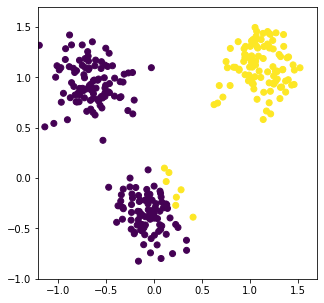

In [79]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.xlim(-1.2, 1.7)
plt.ylim(-1.0, 1.7)
plt.show()

In [6]:
### STATUS: Gaussians generated - algorithm to be implemented

In [23]:
def update_weight(W, M, x_t, y_t, y_hat):
    """ Update weight matrix of W and M.
    Equation (8) in the original paper.
    """
    y_dim = y_t.shape[0]
    y_hat += (y_t * y_t)
    
    # (3,1) x (1,2) = (3,2)
    dW = y_t[:,np.newaxis].dot( x_t[np.newaxis,:] - (W.T.dot(y_t[:,np.newaxis])).T)
    #dW = dW / y_hat[:,np.newaxis]
    # (3, 2)
    
    for i in range(y_dim):
        if y_hat[i] > 0:
            W[i] += (dW[i] / y_hat[i])
    
    # (3,1) x (1,3) = (3,3)
    dM = y_t[:,np.newaxis].dot( y_t[np.newaxis,:] - (M.T.dot(y_t[:,np.newaxis])).T)
    #dM = dM / y_hat[:,np.newaxis]
    
    # Set diagonal elements to zero
    for i in range(M.shape[0]):
        dM[i,i] = 0.0
    
    for i in range(y_dim):
        if y_hat[i] > 0:
            M[i] += (dM[i] / y_hat[i])

In [29]:
def adjust_y_i(y_t, x_t, y_index, lambd=0.6):
    """ If the node in y_t is not active previously, adjust it.
    Equation (5) in the original paper.
    """
    # y_t = (3,)
    # x_t = (2,)
    
    y_dim = y_t.shape[0]
    
    # Calculate squree L2 norm of x_t
    x_norm_sq = x_t.dot(x_t)    
    y_t_sqs = y_t * y_t # (3,)
    
    y_t_adj = np.empty_like(y_t)
    
    d_i = x_norm_sq - (np.sum(y_t_sqs) - y_t_sqs[y_index])
    d_i_sq = d_i * d_i
    if d_i_sq <= lambd:
        return 0.0
    else:
        if d_i < 0.0:
            print("d_i was negative: {}".format(d_i))
            d_i = 0.0
    return np.sqrt(d_i)

In [7]:
# Implement equation 5 (dependency in algorithm)
def adjust_weights(x_t, y_t, index, lamda = 0.6):
    #print("Using equation 5")
    x_squared_norm = np.linalg.norm(x_t)**2
    y_squared = y_t * y_t
    #print(y_t.shape)
    
    test_condition = (x_squared_norm - np.sum(y_squared) + y_squared[index])
    
    if((test_condition ** 2) <= lamda):
        return 0
    else:
        if(test_condition < 0):
            return 0
        else:
            return np.sqrt(test_condition)
    

In [66]:
# Implement equation 8 (dependency in algorithm)
def update_weights(W, M, x_t, y_t, y_hat):
    #y_hat += (y_t * y_t)
    #print("Using equation 8")
    y_dim = y_t.shape[0]
    
    x_t = x_t[np.newaxis, :]
    y_t = y_t[:, np.newaxis]
    
    dW = y_t @ (x_t - (W.T @ y_t).T)
    
    
    for i in range(ydim):
        if(y_hat[i] !=0):
            W[i] = W[i] + dW[i] / y_hat[i]
    
    dM = y_t @ (y_t.T - (M @ y_t).T)
    for i in range(M.shape[0]):
        dM[i][i] = 0
    
    for i in range(ydim):
        if(y_hat[i] !=0):
            M[i] = M[i] + dM[i] / y_hat[i]
    
    

Algorithm 1: Online SNMF <br>
Start with the empty active set {}, W’ = 0 and M = 0. <br> 
For each T=1...Tf
    1. Initialize yT = 0.
    2. Receive xT.
    3. For each degree of freedom in the active set {i}
    compute yT ,i = maxWT ,i xT  MT ,i yT ,0iterating
    until convergence.
    4. If required by (5) add another degree of freedom to
    the active set {i}.
    5. Output yT.
    6. Update “synaptic connections” W’ and M
    according to (8).

In [80]:
T = X.shape[0]
ydim = 3 #From the SNMF Ref. code -- perhaps for number of classes? 
active_set = []
ith_degree_used = np.zeros(ydim)
W = np.zeros((ydim, X.shape[1]))
M = np.zeros((ydim, ydim))

y_hat = np.zeros(ydim) 

clusters = []

iterations = 100

for t in range(T): 
    x_t = X[t] 
    y_t = np.zeros(ydim) 
    #One-hot encoded (sort of - soft encoding not binary) 
    #  element Yt,i is non-zero if sample t is attributed to cluster i. --Quote from paper
    #Should scaling factor from eqn 3 be included? 
    for i in active_set:
        #Iterate till convergence -- convergence criteria not mentioned in paper for this algorithm
        #Ref. Code takes it as 100 steps? 
        for itr in range(iterations): 
            y_ti = max(0, (W[i] @ x_t - M[i] @ y_t))
        y_t[i] = y_ti
        
#     for j in range(ydim):
#         if ith_degree_used[j] == 0:
#             y_t[j] = adjust_weights(x_t, y_t, j)
                
#     for j in range(ydim):
#         if y_t[j] != 0.0:
#             ith_degree_used[j] += 1
            
#     for j in range(ydim):
#         if (j not in active_set) and ith_degree_used[j] > 0:
#             active_set.append(j)
        
    
    
    for j in range(ydim):
        if ith_degree_used[j] == 0:
            y_t[j] = adjust_weights(x_t, y_t, j)
            #y_t[j] = adjust_y_i(y_t, x_t, j)
            
    for j in range(ydim):
        #Check all degrees of freedom
        #So far, this degree of freedom has not been used, then adjust weights by eqn 5;
        if(ith_degree_used[j] == 0):  
            y_t[j] = adjust_weights(x_t, y_t, j)
            #y_t[j] = adjust_y_i(y_t, x_t, j)
            #active_set.append(j)
        if(y_t[j]!=0):
            ith_degree_used[j] = ith_degree_used[j] + 1
            if(j not in active_set):
                active_set.append(j)
    
    #print(active_set)
    #Now, update weights as per eqn 8
    y_hat = y_hat + y_t * y_t #DIFFERENT FROM ORIGINAL IMPLEMENTATION but makes sense to me? 
    #update_weight(W, M, x_t, y_t, y_hat)
    update_weights(W, M, x_t, y_t, y_hat)
      
    cluster = np.argmax(y_t)
    #if(cluster == 2):
    #    print(i+1)
    #print(cluster)
    clusters.append(cluster)

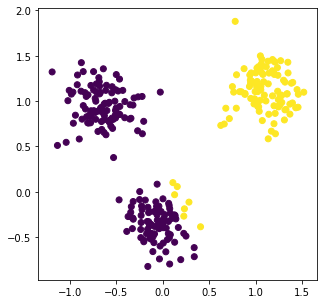

In [81]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [ ]:
W.T.shape

In [ ]:
x_t.shape

In [ ]:
y_t.shape

In [ ]:
W.T

In [ ]:
x_t[np.newaxis,:].shape

In [ ]:
x_t

In [ ]:
x_t.shape

In [ ]:
    x_t = x_t[np.newaxis, :]
    y_t = y_t[:, np.newaxis]

In [ ]:
y_t@(M@y_t).T

In [ ]:
x_t.shape

In [ ]:
y_t.shape

In [ ]:
W.shape

In [ ]:
W.T.shape

In [ ]:
W.T @ y_t

In [ ]:
y_t @ x_t

In [ ]:
y_t @ W.T @ y_t

In [ ]:
y_t.shape

In [ ]:
W.T.shape

In [ ]:
dW.shape

In [ ]:
y_t